*SOURCE
[Kaggle](https://www.kaggle.com/code/farzadnekouei/employee-turnover-prediction-xgboost-vs-catboost)

<img src="https://github.com/FarzadNekouee/XGBoost-CatBoost-Employee-Resignation/blob/master/image.jpg?raw=true" width="1800">

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>Problem:</font></h3>

Employee turnover is a significant challenge for many organizations. It is costly in terms of both lost productivity and the expenses associated with recruiting, hiring, and training new employees. Understanding and predicting which employees are at risk of leaving can help an organization to take proactive steps to retain valuable employees and maintain organizational stability. In this project, we will use a dataset containing information about employees and whether or not they left the company. Our task is to build a model that can predict the probability that a given employee will leave the company. We will approach this binary classification problem using regression algorithms for reasons such as probabilistic interpretation, threshold calibration, and better performance on imbalanced data.

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

<h3 align="left"><font color=#009c05>Objectives:</font></h3>

* __Dataset Overview__: Understand the basic information, summary statistics for numerical and categorical variables.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: 
  - Analyze the distribution of numerical features against the target variable.
  - Analyze the distribution of categorical features against the target variable.
* __Data Preprocessing__:
  - Check for missing values.
  - Encode categorical features.
* __Model Building__:
  - Define XGBoost and CatBoost Regressors.
  - Tune the hyperparameters for both models to achieve the best performance.
  - Evaluate the performance of both models using regression metrics like MAE, MSE, RMSE, and R2 Score.
* __Conclusion__: Summarize the findings, compare the performance of the models.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

<h3 align="left"><font color=#009c05>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Numerical Features vs Target](#num_target)
    - [Step 4.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Check Missing Values](#missing)
    - [Step 5.2 | Encode Categorical Features](#encode)
    - [Step 5.3 | Split the Dataset](#split)
* [Step 6 | Build XGBoost Regressor](#xgb)
    - [Step 6.1 | XGBoost Base Model Definition](#xgb_base)
    - [Step 6.2 | XGBoost Hyperparameter Tuning](#xgb_hp)
    - [Step 6.3 | XGBoost Regressor Evaluation](#xgb_eval)
* [Step 7 | Build CatBoost Regressor](#ctb)
    - [Step 7.1 | CatBoost Base Model Definition](#ctb_base)
    - [Step 7.2 | CatBoost Hyperparameter Tuning](#ctb_hp)
    - [Step 7.3 | CatBoost Regressor Evaluation](#ctb_eval)
* [Step 8 | Conclusion](#conclusion)

<h2 align="left"><font color=#009c05>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color: #009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#f1faeb'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:#009c05 ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/employee-worker/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<div style="border-radius:10px; padding: 15px; background-color:  #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>Dataset Description:</font></h3>

| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __satisfaction_level__ | The level of satisfaction of the employee |
| __last_evaluation__ | The score of the last evaluation of the employee |
| __number_project__ | The number of projects the employee has worked on |
| __average_montly_hours__ | The average monthly hours worked by the employee |
| __time_spend_company__ | The number of years the employee has spent at the company |                     
| __Work_accident__ | Whether the employee had a work accident (1 = yes, 0 = no) |
| __left__ | Whether the employee has left the company (1 = yes, 0 = no) |  
| __promotion_last_5years__ | Whether the employee had a promotion in the last 5 years (1 = yes, 0 = no) |                      
| __sales__ | The department the employee works in |
| __salary__ | The salary level of the employee (low, medium, high) |


<a id="overview"></a>
# <p style="background-color:#009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:#8fc265'>Step 3.1 |</span><span style='color:#009c05'> Dataset Basic Information</span></b>

In [4]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<div style="border-radius:10px; padding: 15px; background-color:  #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>Inference:</font></h3>

* __Number of Entries__: The dataset consists of __14999 entries__, ranging from index 0 to 14998.
    
    
* __Columns__: There are __10 columns__ in the dataset corresponding to various attributes of the employees.
    
    
* __Data Types__:
    - Two of the columns are of the __float64__ data type.
    - Six of the columns are of the __int64__ data type.
    - Two of the columns are of the __object__ data type.
    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 14999 non-null entries.


<div style="border-radius:10px; padding: 15px; background-color:  #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>Note:</font></h3>
    
Based on the data types and the feature explanations provided earlier, we identified that __5 columns__ (`Work_accident`, `left`, `promotion_last_5years`, `sales`, `salary`) are __categorical__ in terms of their semantics. These features must have string (__object__) data type to ensure proper analysis and interpretation in subsequent steps:

In [5]:
# Define the continuous features
continuous_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident             object
left                      object
promotion_last_5years     object
sales                     object
salary                    object
dtype: object

<a id="num_statistics"></a>
# <b><span style='color:#8fc265'>Step 3.2 |</span><span style='color:#009c05'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [6]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">
<h3 align="left"><font color=#009c05>Inference for Numerical Variables:</font></h3>

* __`satisfaction_level`__: Varies from 0.09 to 1.00 with a mean satisfaction level of approximately 0.61.
    
    
* __`last_evaluation`__: Scores range from 0.36 to 1.00 with a mean score of approximately 0.72.
    
    
* __`number_project`__: Varies from 2 to 7 with an average number of projects being approximately 3.80.
    
    
* __`average_montly_hours`__: Worked by employees ranges from 96 to 310 hours with a mean of approximately 201 hours.
    
    
* __`time_spend_company`__: Ranges from 2 to 10 years with a mean of approximately 3.5 years.

<a id="cat_statistics"></a>
# <b><span style='color:#8fc265'>Step 3.3 |</span><span style='color:#009c05'> Summary Statistics for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Work_accident,left,promotion_last_5years,sales,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">
<h3 align="left"><font color=#009c05>Inference for Categorical Variables:</font></h3>

* __`Work_accident`__: Two unique values, __0__ and __1__, with the majority of employees (12830 out of 14999) not having had a work accident.
    
    
* __`left`__: Two unique values, 0 and 1. The majority of employees (11428 out of 14999) have not left the company, indicating that __the dataset is imbalanced__ towards employees who have not left.
    
    
* __`promotion_last_5years`__: Two unique values, __0__ and __1__, with the majority of employees (14680 out of 14999) not having had a promotion in the last 5 years.
    
    
* __`sales`__: Ten unique values, representing the different departments. The '__sales__' department is the most common department in the dataset.
    
    
* __`salary`__: Three unique values, '__low__', '__medium__', and '__high__', with '__low__' being the most common salary level in the dataset.



<a id="eda"></a>
# <p style="background-color:#009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="num_target"></a>
# <b><span style='color:#8fc265'>Step 4.1 |</span><span style='color:#009c05'> Numerical Features vs Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

I will generate KDE plots for the continuous features against the target variable to discern which features have a significant influence on an employee's decision to leave the company:

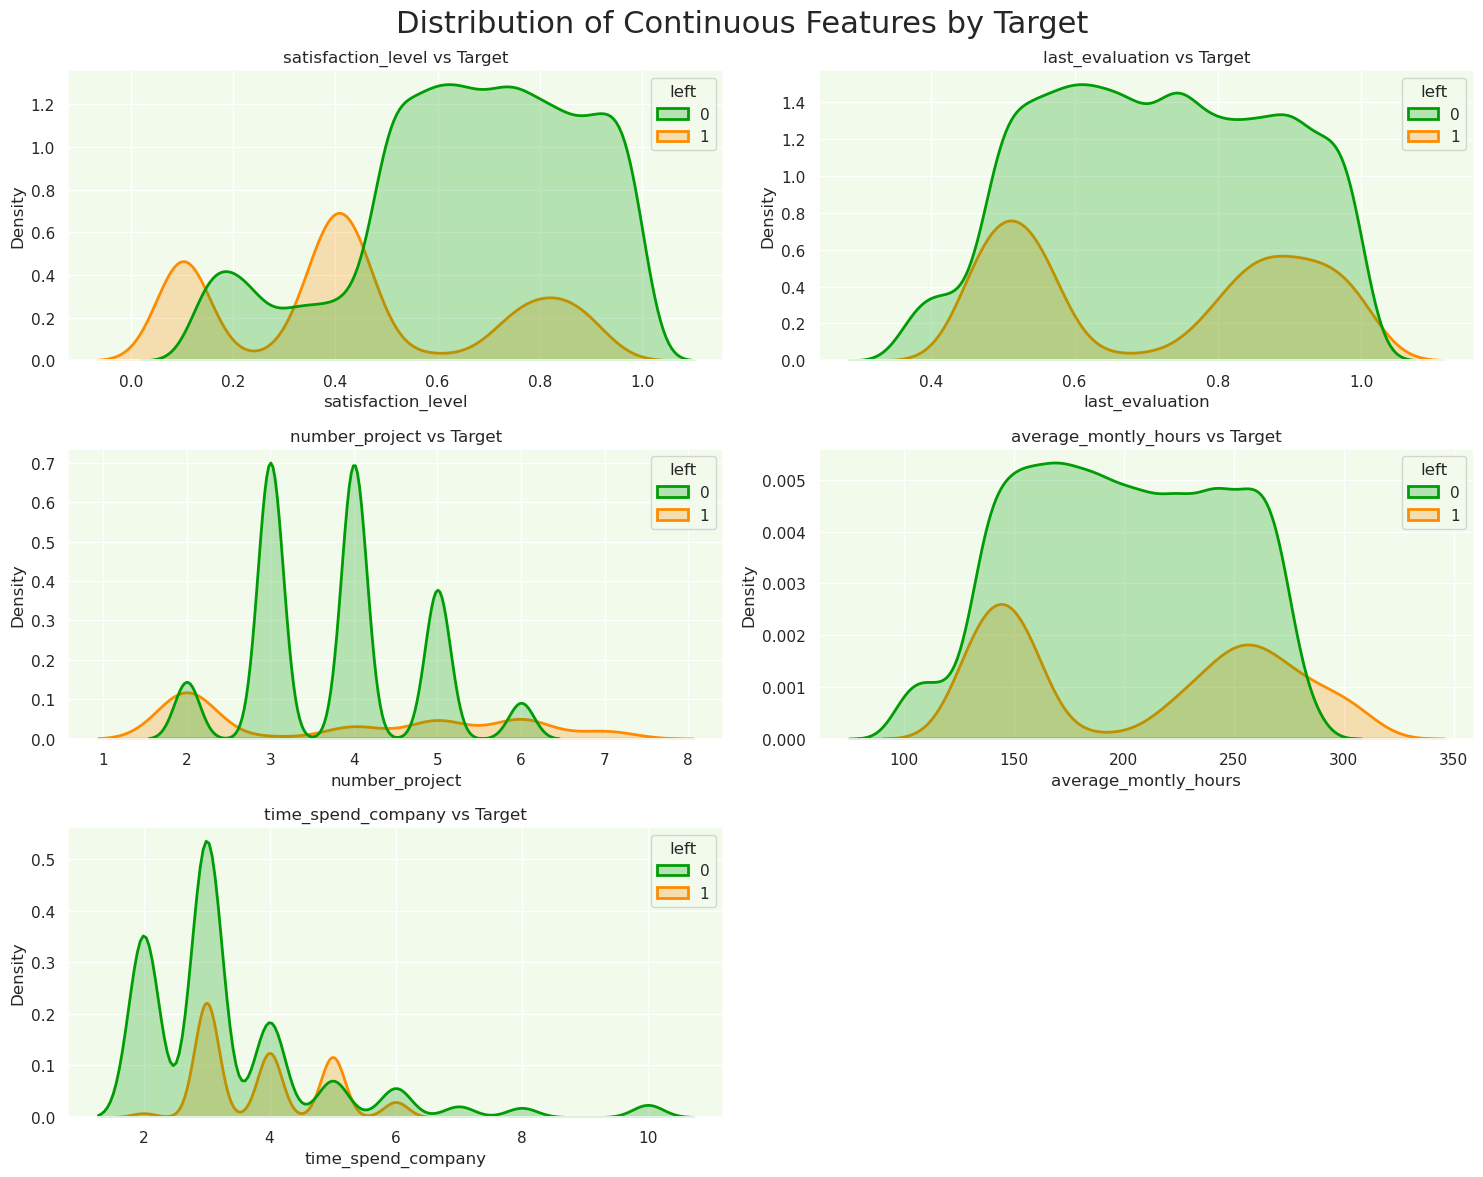

In [8]:
# Create subplots for kde plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for ax, col in zip(axes.flatten(), continuous_features):
    sns.kdeplot(data=df, x=col, fill=True, linewidth=2, hue='left', ax=ax, palette = {0: '#009c05', 1: 'darkorange'})
    ax.set_title(f'{col} vs Target')

axes[2,1].axis('off')
plt.suptitle('Distribution of Continuous Features by Target', fontsize=22)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:  #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>Inference:</font></h3>
    
- The `satisfaction_level` plot shows that employees who left the company generally had a lower satisfaction level compared to those who stayed.
    
    
- The `last_evaluation` plot does not show a clear distinction between the two classes.
    
    
- The `number_project` plot shows that employees who left the company generally worked on a very high or very low number of projects.
    
    
- The `average_montly_hours` plot shows that employees who left the company generally worked very long or very short hours.
    
    
- The `time_spend_company` plot shows that employees who left the company generally spent a moderate amount of time at the company.
    
____ 
    
Overall, `satisfaction_level`, `number_project`, `average_montly_hours`, and `time_spend_company` seem to have a significant impact on whether an employee leaves the company or not.

<a id="cat_target"></a>
# <b><span style='color:#8fc265'>Step 4.2 |</span><span style='color:#009c05'> Categorical Features vs Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color:  #f0ffe3; font-size:120%; text-align:left">

To visualize the impact of categorical features on the target, I am using a bar plot to show the frequency of each category for each target class:

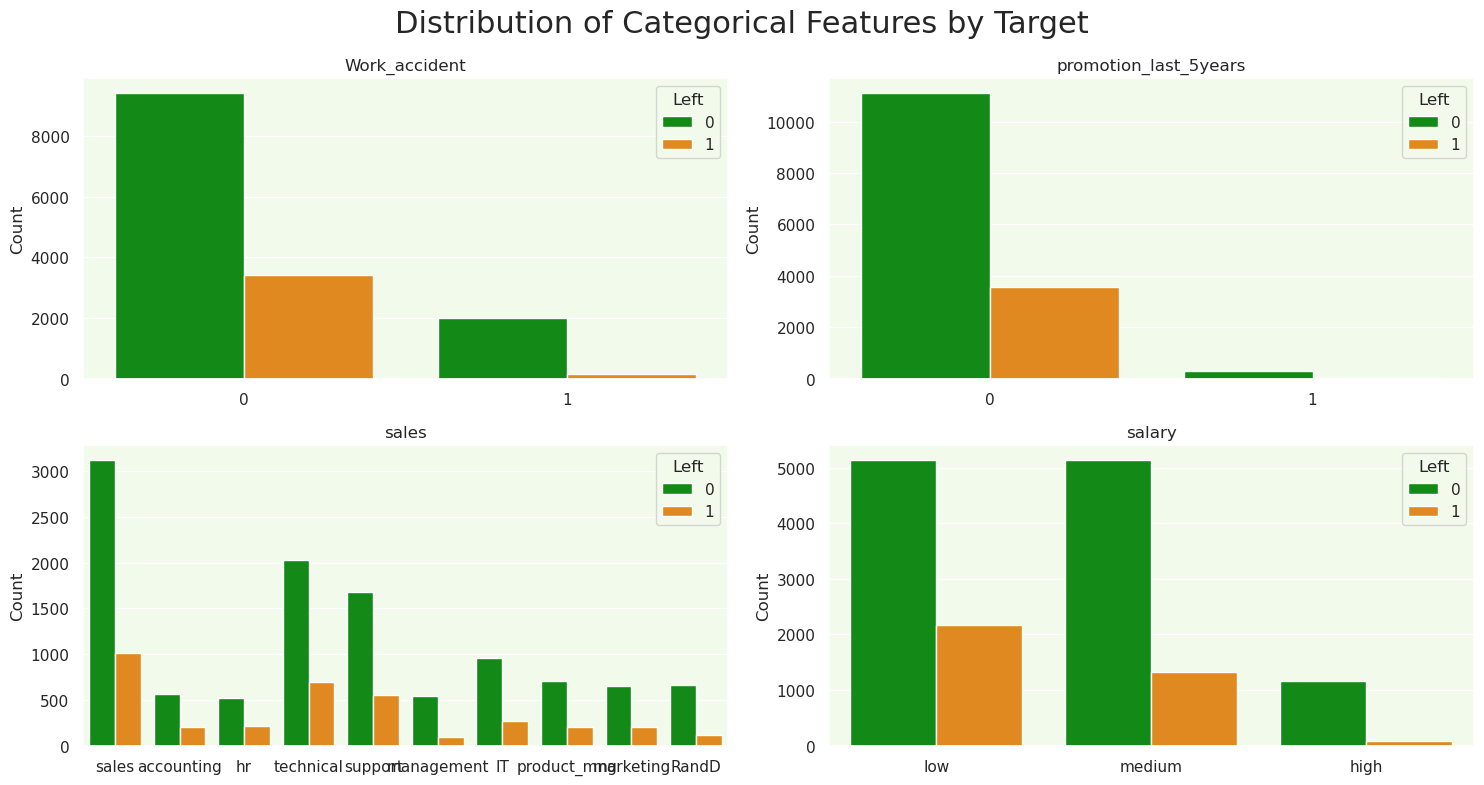

In [9]:
# List of categorical features
cat_features = ['Work_accident', 'promotion_last_5years', 'sales', 'salary']

# Initialize the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plot each feature
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=cat_features[i], hue='left', data=df, ax=ax, palette={0: '#009c05', 1: 'darkorange'})
    ax.set_title(cat_features[i])
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.legend(title='Left', loc='upper right')

plt.suptitle('Distribution of Categorical Features by Target', fontsize=22)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:  #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>Inference:</font></h3>
    
- The `Work_accident` plot shows that employees who had a work accident are less likely to leave the company.
    
    
- The `promotion_last_5years` plot shows that employees who have not received a promotion in the last 5 years are more likely to leave the company.
    
    
- The `sales` plot shows the distribution of employees who left or did not leave the company across different departments. It seems that the sales, technical, and support departments have the highest number of employees who left the company.
    
    
- The `salary` plot shows that employees with a low salary are more likely to leave the company than those with a medium or high salary.
    
____
    
The `Work_accident`, `promotion_last_5years`, and `salary` features seem to have a significant impact on whether an employee leaves the company or not.

<a id="preprocessing"></a>
# <p style="background-color:#009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming raw data into a format that can be understood by machine learning algorithms. For this project, the following preprocessing steps will be performed:

1. __Check Missing Values__
    
2. __Categorical Features Encoding__

3. __Split the Dataset__
    

In [10]:
# Reload the dataset to retain the original data types of the variables
df = pd.read_csv('/kaggle/input/employee-worker/HR.csv')

<a id="missing"></a>
# <b><span style='color:#8fc265'>Step 5.1 |</span><span style='color:#009c05'> Check Missing Values</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">
    
First, check for any missing values in the dataset and handle them appropriately:

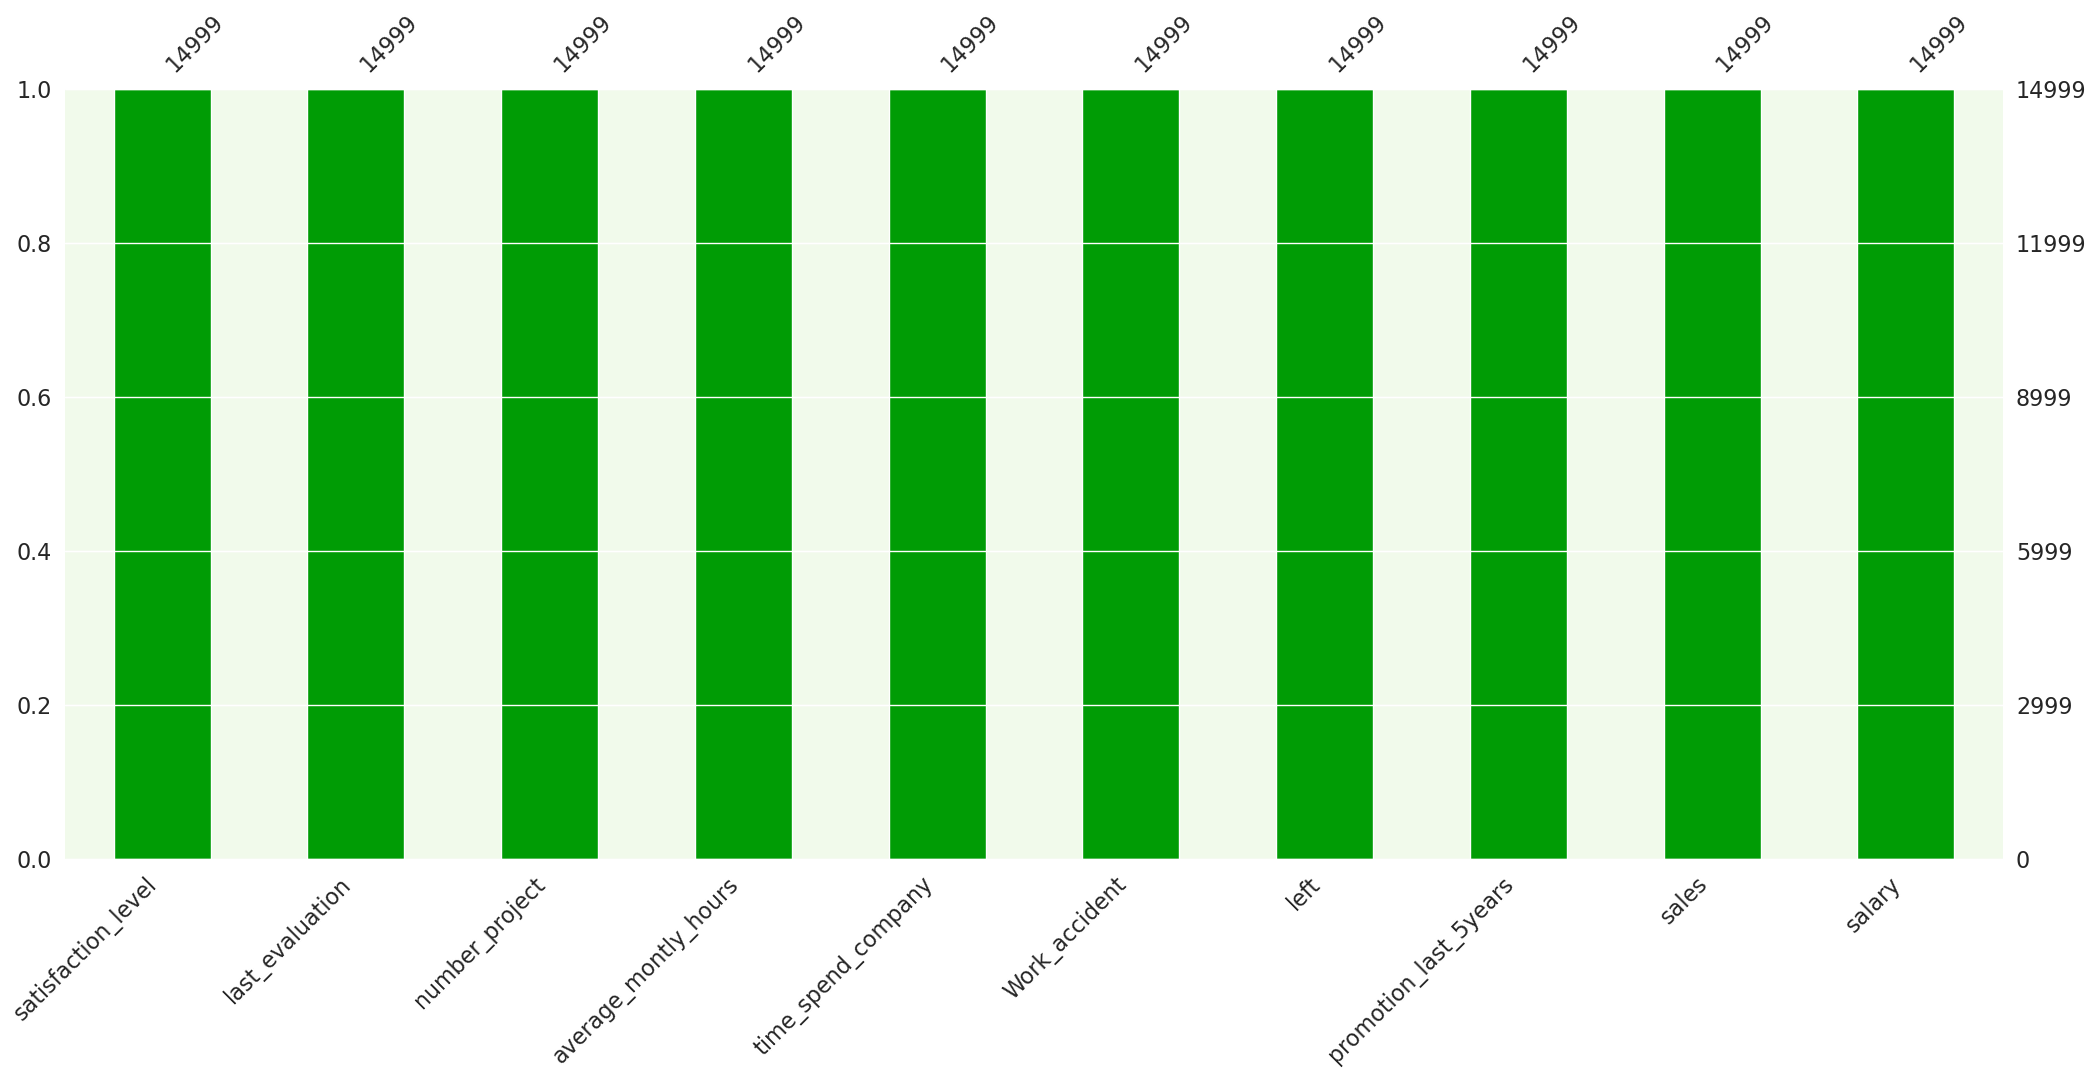

In [11]:
# Generate the missing values matrix using missingno.bar()
msno.bar(df, color='#009c05')

# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">


Our dataset has no missing values, eliminating the need for imputation or removal decisions that could introduce bias or reduce our dataset size.


<a id="encode"></a>
# <b><span style='color:#8fc265'>Step 5.2 |</span><span style='color:#009c05'> Encode Categorical Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

After performing the pre-processing steps, I am going to start modeling with XGBoost and CatBoost regressors. CatBoost can handle categorical variables directly, but XGBoost cannot. So, for XGBoost, we need to convert categorical variables to numeric.

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

We can make the following decisions:

1. __Numerical Variables__: These are variables that are already in numerical format and do not need encoding.
    - `satisfaction_level`: This is a continuous variable ranging from 0 to 1.
    - `last_evaluation`: This is a continuous variable ranging from 0 to 1.
    - `number_project`: This is a discrete variable representing the number of projects completed by an employee.
    - `average_montly_hours`: This is a continuous variable representing the average monthly hours worked by an employee.
    - `time_spend_company`: This is a discrete variable representing the number of years an employee has spent at the company.

    
2. __Ordinal Variables__: These variables have an inherent order. They don't necessarily need to be one-hot encoded since their order can provide meaningful information to the model:
    
    - `salary`: This variable has 3 unique values ('low', 'medium', 'high') which have an inherent order. Therefore, it can be label encoded.

    
3. __Nominal Variables__: These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model:
    
    - `sales`: This variable represents the department of the employee and has 10 unique values. It should be one-hot encoded.

4. __Binary Variables__: These are variables with only two categories and do not need to be one-hot encoded:
    
    - `Work_accident`: This is a binary variable (0 or 1).
    - `left`: This is the target variable and is binary (0 or 1).
    - `promotion_last_5years`: This is a binary variable (0 or 1).

    
<h3 align="left"><font color=#009c05>Summary:</font></h3>

- __Need Label Encoding__: `salary`
- __Need One-Hot Encoding__: `sales`

In [12]:
# Implementing one-hot encoding on the 'sales' feature
df_encoded = pd.get_dummies(df, columns=['sales'], drop_first=True)

# Label encoding of 'salary' feature
le = LabelEncoder()
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])

df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [13]:
df_encoded.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                     int64
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_marketing            uint8
sales_product_mng          uint8
sales_sales                uint8
sales_support              uint8
sales_technical            uint8
dtype: object

<a id="split"></a>
# <b><span style='color:#8fc265'>Step 5.3 |</span><span style='color:#009c05'> Split the Dataset</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">
    
Finally, I am going to split the data into a training set and a testing set. This is important for evaluating the model's performance:

In [14]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

In [15]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:115%; text-align:left">

<h3 align="left"><font color=#009c05>Note:</font></h3>
    
- In the above split, we used __Stratification__ which ensures that the distribution of the target variable (`left`) is the same in both the train and test sets

<a id="xgb"></a>
# <p style="background-color:#009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Build XGBoost Regressor</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

We are going to use regression algorithms instead of classification algorithms in this project for three main reasons:

1. __Probabilistic Interpretation__: Regression algorithms can predict a continuous output which can be interpreted as the probability of a certain event. In this case, the output can be interpreted as the probability that an employee will leave the company. This information can be more informative than just a binary output and can help in understanding how 'at risk' each employee is of leaving.

    
2. __Threshold Calibration__: By predicting probabilities, we can adjust the threshold for classifying an observation as 0 or 1. For example, we might classify all employees with a predicted probability of leaving greater than 0.5 as 'will leave'. However, we can adjust this threshold to be more conservative or more liberal depending on the cost of false positives and false negatives. For example, if it is more costly to incorrectly predict that an employee will stay when they actually leave, we might lower the threshold to 0.3 to identify more employees at risk of leaving.

    
3. __Imbalanced Data__: The target variable, `left`, is imbalanced with a larger proportion of employees who did not leave the company. This can sometimes lead to poor performance for classification algorithms because they have a bias towards the majority class. Regression algorithms do not have this bias and can sometimes perform better on imbalanced data.

Using regression algorithms will allow for a more nuanced understanding of the risk of each employee leaving, allow for threshold calibration, and might perform better on imbalanced data.



<a id="xgb_base"></a>
# <b><span style='color:#8fc265'>Step 6.1 |</span><span style='color:#009c05'> XGBoost Base Model Definition</span></b>

In [16]:
# Define the model
xgb_base = xgb.XGBRegressor(objective ='reg:squarederror')

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">
<h3 align="left"><font color=#009c05>Note:</font></h3>
    
- The `objective` parameter defines the loss function that XGBoost will minimize

<a id="xgb_hp"></a>
# <b><span style='color:#8fc265'>Step 6.2 |</span><span style='color:#009c05'> XGBoost Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

I am establishing a function to determine the optimal set of hyperparameters that yield the lowest __negative mean squared error__ for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:


In [17]:
def tune_regressor_hyperparameters(reg, param_grid, X_train, y_train, scoring='neg_mean_squared_error', n_splits=3):
    '''
    This function optimizes the hyperparameters for a regressor by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (KFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest negative mean squared error is selected as the default scoring metric. 
    The function returns the regressor with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using KFold
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    reg_grid = GridSearchCV(reg, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    reg_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = reg_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return reg_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_regressor_hyperparameters__ function to pinpoint the optimal hyperparameters for our XGBoost regressor:

In [18]:
# Define the parameters for grid search
xgb_param_grid = {
    'max_depth': [4, 5],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [200, 250, 300],
    'min_child_weight': [2, 3, 4]
}

In [19]:
# Tune the hyperparameters
best_xgb, best_xgb_hyperparameters = tune_regressor_hyperparameters(xgb_base, xgb_param_grid, X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
print('XGBoost Regressor Optimal Hyperparameters: \n', best_xgb_hyperparameters)

XGBoost Regressor Optimal Hyperparameters: 
 {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300}


<a id="xgb_eval"></a>
# <b><span style='color:#8fc265'>Step 6.3 |</span><span style='color:#009c05'> XGBoost Regressor Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

To streamline the evaluation of different models, I will define a function that computes key performance metrics such as __Mean Absolute Error (MAE)__, __Mean Squared Error (MSE)__, __Root Mean Squared Error (RMSE)__, and __R-squared (R2)__ score. This approach will ensure consistency in how we assess each model and facilitate comparisons between them:

In [21]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate metrics for testing data
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame(data = [mae_test, mse_test, rmse_test, r2_test],
                              index = ['MAE', 'MSE', 'RMSE', 'R2 Score'],
                              columns = [model_name])
    
    # Print the metrics
    print(f"{model_name} Training Data Metrics:")
    print("MAE: {:.4f}".format(mae_train))
    print("MSE: {:.4f}".format(mse_train))
    print("RMSE: {:.4f}".format(rmse_train))
    print("R2 Score: {:.4f}".format(r2_train))
    
    print(f"\n{model_name} Testing Data Metrics:")
    print("MAE: {:.4f}".format(mae_test))
    print("MSE: {:.4f}".format(mse_test))
    print("RMSE: {:.4f}".format(rmse_test))
    print("R2 Score: {:.4f}".format(r2_test))
        
    return metrics_df

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">
    
Let's call the above function for evaluating our XGBoost regressor:

In [22]:
xgb_result = evaluate_model(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost')

XGBoost Training Data Metrics:
MAE: 0.0247
MSE: 0.0039
RMSE: 0.0627
R2 Score: 0.9784

XGBoost Testing Data Metrics:
MAE: 0.0423
MSE: 0.0125
RMSE: 0.1116
R2 Score: 0.9313


<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>✅ Inference:</font></h3>
    
The provided XGBoost model demonstrates a good performance on both the training and testing data. The difference in metrics (MAE, MSE, RMSE, R2 Score) between the two sets is minor, indicating a balanced model that is not significantly overfitting. The model shows a high R2 score of 0.978 on the training data, indicating a good fit, and a slightly lower R2 score of 0.931 on the testing data, suggesting decent generalization. The MAE, MSE, and RMSE on the test set are 0.042, 0.012, and 0.112, respectively, which indicates that the model is making small errors on average. Overall, the model's performance is satisfactory and there is no strong evidence of overfitting.


<a id="ctb"></a>
# <p style="background-color:#009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Build CatBoost Regressor</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="ctb_base"></a>
# <b><span style='color:#8fc265'>Step 7.1 |</span><span style='color:#009c05'> CatBoost Base Model Definition</span></b>

In [23]:
# Define the model
ctb_base = CatBoostRegressor(verbose=0)

<a id="ctb_hp"></a>
# <b><span style='color:#8fc265'>Step 7.2 |</span><span style='color:#009c05'> CatBoost Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">
    
Afterward, I am setting up the hyperparameters grid and utilize the tune_regressor_hyperparameters function to pinpoint the optimal hyperparameters for our CatBoost regressor:

In [24]:
# Define the parameters for grid search
ctb_param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

In [25]:
# Tune the hyperparameters
best_ctb, best_ctb_hyperparameters = tune_regressor_hyperparameters(ctb_base, ctb_param_grid, X_train, y_train)

In [26]:
print('\nCatBoost Regressor Optimal Hyperparameters: \n', best_ctb_hyperparameters)


CatBoost Regressor Optimal Hyperparameters: 
 {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


<a id="ctb_eval"></a>
# <b><span style='color:#8fc265'>Step 7.3 |</span><span style='color:#009c05'> CatBoost Regressor Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

Finally, I am evaluating the model's performance on both the training and test datasets using `evaluate_model` function:

In [27]:
ctb_result = evaluate_model(best_ctb, X_train, y_train, X_test, y_test, 'CatBoost')

CatBoost Training Data Metrics:
MAE: 0.0234
MSE: 0.0037
RMSE: 0.0612
R2 Score: 0.9794

CatBoost Testing Data Metrics:
MAE: 0.0392
MSE: 0.0116
RMSE: 0.1078
R2 Score: 0.9359


<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

<h3 align="left"><font color=#009c05>✅ Inference:</font></h3>
    
The provided CatBoost model demonstrates a good performance on both the training and testing data. The difference in metrics (MAE, MSE, RMSE, R2 Score) between the two sets is minor, indicating a balanced model that is not significantly overfitting. The model shows a high R2 score of 0.9794 on the training data, indicating a good fit, and a slightly lower R2 score of 0.9359 on the testing data, suggesting decent generalization. The MAE, MSE, and RMSE on the test set are 0.0392, 0.0116, and 0.1078, respectively, which indicates that the model is making small errors on average. Overall, the model's performance is satisfactory and there is no strong evidence of overfitting. Additionally, __the CatBoost model's performance is almost similar to the XGBoost model, making it a good alternative for this particular dataset.__

<a id="conclusion"></a>
# <p style="background-color:#009c05; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Conclusion</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">

In the final step, let's assess our models using various regression metrics:

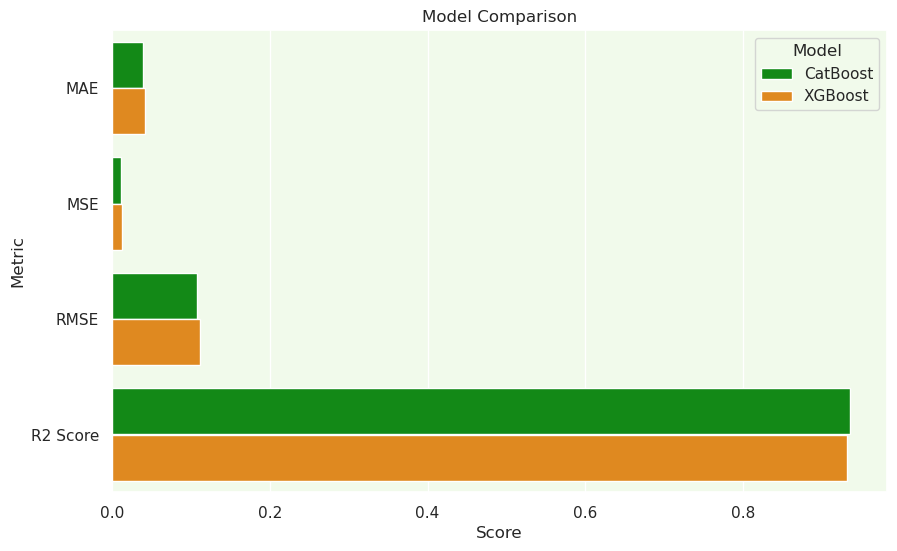

In [28]:
# Combine the dataframes
combined_df = pd.concat([ctb_result.T, xgb_result.T], axis=0)
combined_df['Model'] = ['CatBoost', 'XGBoost']

# Melt the dataframe
melted_df = combined_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define custom colors
custom_colors = ['#009c05', 'darkorange']

# Create the barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='Metric', hue='Model', data=melted_df, palette=custom_colors)

plt.title('Model Comparison')
plt.show()

In [29]:
combined_df

,MAE,MSE,RMSE,R2 Score,Model
CatBoost,0.039190,0.011617,0.107781,0.935945,CatBoost
XGBoost,0.042257,0.012462,0.111636,0.931282,XGBoost


<div style="border-radius:10px; padding: 15px; background-color: #f0ffe3; font-size:120%; text-align:left">
    
The results from the CatBoost and XGBoost models on predicting whether an employee will leave the company are quite similar and not significantly different from each other. Both models have almost the same Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score. The differences are very small and suggest that __both models are performing almost equivalently on this task.__

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color: #f0ffe3; font-size: 120%; text-align: center;">

<strong>🎯 If you need more information or want to explore the code, feel free to visit the project repository on <a href="https://github.com/FarzadNekouee/XGBoost-CatBoost-Employee-Resignation">GitHub</a> 🎯</strong>
</div>


<h2 align="left"><font color='#009c05'>Best Regards!</font></h2>